In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Twitter Sentiments.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt


In [8]:
df['Clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [9]:
df.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
df['Clean_tweet']=df['Clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [12]:
df['Clean_tweet']=df['Clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
tokenized_tweet=df['Clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Clean_tweet, dtype: object

In [14]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Clean_tweet, dtype: object

In [15]:
for a in range(len(tokenized_tweet)):
    tokenized_tweet[a]=" ".join(tokenized_tweet[a])

df['Clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [16]:
#EDA

all_words=" ".join([sentence for sentence in df['Clean_tweet']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=1000, height=500, random_state=42, max_font_size=100).generate(all_words)

In [18]:
import matplotlib.pyplot as plt

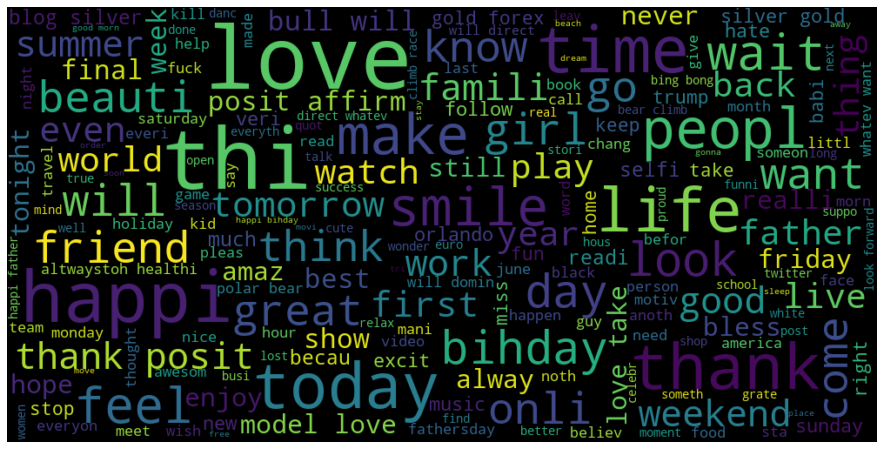

In [19]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
def extract_hashtag(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

ht_positive=extract_hashtag(df['Clean_tweet'][df['label']==0])
ht_negative=extract_hashtag(df['Clean_tweet'][df['label']==1])


In [21]:
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [22]:
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [23]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [24]:
freq=nltk.FreqDist(ht_negative)
df1=pd.DataFrame({'Hashtag':list(freq.keys()),
               'Count':list(freq.values())})
df1.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


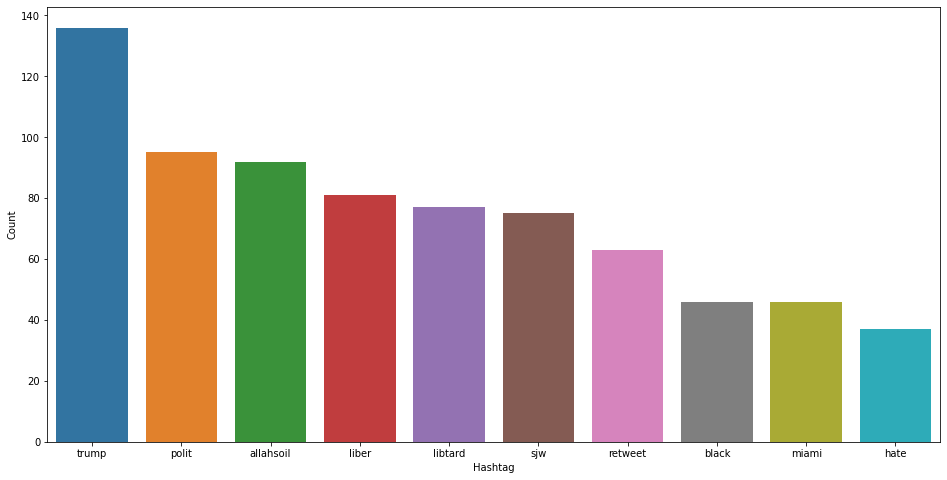

In [25]:
df1=df1.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,8))
sns.barplot(data=df1,x='Hashtag',y='Count')
plt.show()

In [26]:
freq=nltk.FreqDist(ht_positive)
df1=pd.DataFrame({'Hashtag':list(freq.keys()),
               'Count':list(freq.values())})
df1.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


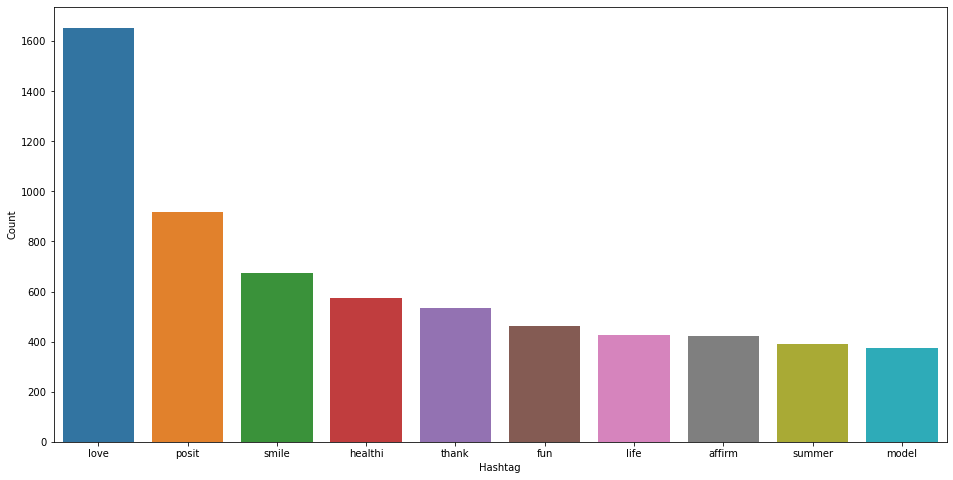

In [27]:
df1=df1.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,8))
sns.barplot(data=df1,x='Hashtag',y='Count')
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['Clean_tweet'])

In [29]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 124813 stored elements in Compressed Sparse Row format>

In [30]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [33]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [34]:
prediction=model.predict(x_test)
f1_score(y_test,prediction)

0.49763033175355453

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,prediction)

0.9469403078463271

In [38]:
pred_probability=model.predict_proba(x_test)
pred=pred_probability[:,1]>=0.3
pred=pred.astype(np.int)

f1_score(y_test,prediction)

0.49763033175355453